## Sea Level Predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.
* Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

#### Use Pandas to import the data from epa-sea-level.csv

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
df = pd.read_csv(r'C:\Users\loren\Desktop\Data Analysis\Sea Level Predictor\epa-sea-level.csv')

In [37]:
df = df.rename(columns={'CSIRO Adjusted Sea Level': 'csiro_level', 'Lower Error Bound': 'lower_error', 'Upper Error Bound': 'upper_error', 'NOAA Adjusted Sea Level':'noaa_level'})

In [38]:
df

,Year,csiro_level,lower_error,upper_error,noaa_level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


#### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

Text(0, 0.5, 'CSIRO Sea Level')

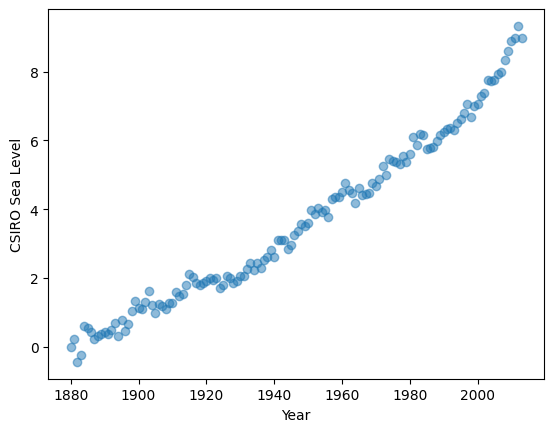

In [39]:
plt.scatter(df.Year, df.csiro_level, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CSIRO Sea Level")

#### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [40]:
new_year = pd.Series(range(2014,2051))

In [41]:
df_year = pd.DataFrame(new_year, columns=['Year'])

In [42]:
df_to_predict = df.copy()

In [43]:
df_to_predict = pd.concat([df_to_predict, df_year],
                  ignore_index = True)

In [50]:
df_to_predict

,Year,csiro_level,lower_error,upper_error,noaa_level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
166,2046,NaN,NaN,NaN,NaN
167,2047,NaN,NaN,NaN,NaN
168,2048,NaN,NaN,NaN,NaN
169,2049,NaN,NaN,NaN,NaN


In [54]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.Year, df.csiro_level)

Text(0, 0.5, 'CSIRO Sea Level')

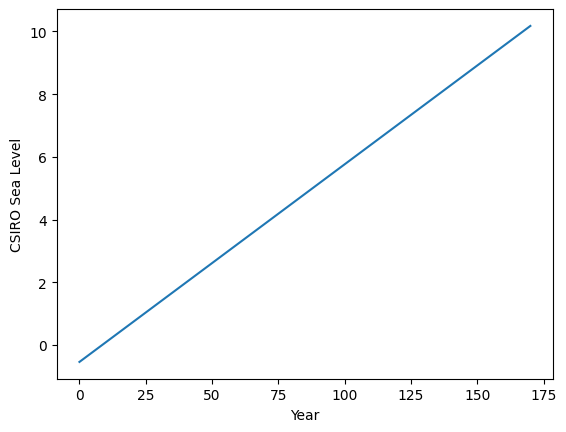

In [55]:
plt.plot(intercept + slope*df_to_predict.Year, label='fitted line')
plt.xlabel("Year")
plt.ylabel("CSIRO Sea Level")

Text(0, 0.5, 'Sea Level (inches)')

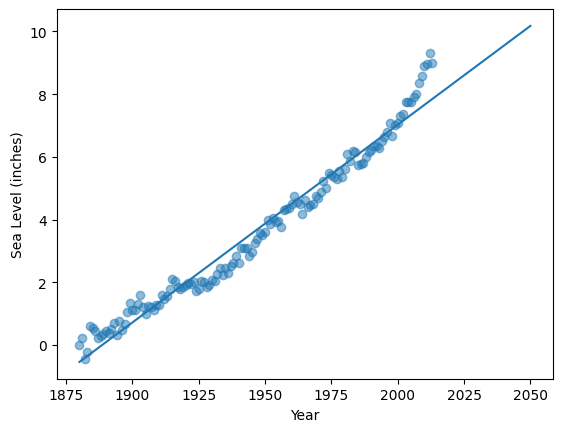

In [56]:
plt.scatter(df_to_predict.Year, df_to_predict.csiro_level, alpha=0.5)
plt.plot(df_to_predict.Year,intercept + slope*df_to_predict.Year)    
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")

#### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [64]:
df_2000 = df[df["Year"] > 1999]
df_2000

,Year,csiro_level,lower_error,upper_error,noaa_level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [73]:
df2000_to_predict = df_2000.copy()
df2000_to_predict = pd.concat([df2000_to_predict, df_year],
                  ignore_index = True)

df2000_to_predict

,Year,csiro_level,lower_error,upper_error,noaa_level
0,2000,7.062992,6.791339,7.334646,6.920582
1,2001,7.287402,7.019685,7.555118,7.087460
2,2002,7.381890,7.110236,7.653543,7.319698
3,2003,7.759843,7.484252,8.035433,7.488353
4,2004,7.740157,7.464567,8.015748,7.507933
5,2005,7.744094,7.472441,8.015748,7.644563
6,2006,7.917323,7.645669,8.188976,7.697420
7,2007,7.996063,7.712598,8.279528,7.702147
8,2008,8.350394,8.078740,8.622047,7.907365
9,2009,8.586614,8.311024,8.862205,8.046354


Text(0, 0.5, 'CSIRO Sea Level')

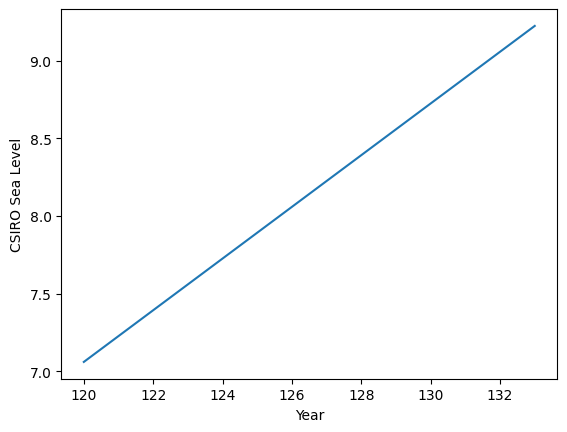

In [75]:
slope_2000, intercept_2000, r_value_2000, p_value_2000, std_err_2000 = stats.linregress(df_2000.Year, df_2000.csiro_level)
plt.plot(intercept_2000 + slope_2000*df_2000.Year, label='fitted line')
plt.xlabel("Year")
plt.ylabel("CSIRO Sea Level")

Text(0, 0.5, 'Sea Level (inches)')

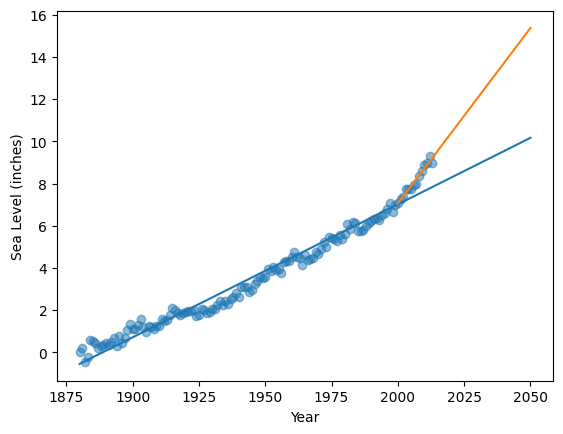

In [77]:
plt.scatter(df_to_predict.Year, df_to_predict.csiro_level, alpha=0.5)
plt.plot(df_to_predict.Year,intercept + slope*df_to_predict.Year)  
plt.plot(df2000_to_predict.Year,intercept_2000 + slope_2000*df2000_to_predict.Year)    
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")